<a href="https://colab.research.google.com/github/TonyaAlekhina/Big-Data-Analysis/blob/main/Project_2_gas_station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Знакомство с задачей

Как исследовать поведение водителей на заправках? Например, обратиться к статистике Яндекс.Навигатора: узнать, на какую именно заправку заезжал водитель и сколько времени там провёл.

Ваши коллеги из Навигатора собрали необходимые данные и прислали их в таком виде.

Зашифрованное наименование сети АЗС (столбец `name`): вместо брендов — названия растений.

Уникальный идентификатор конкретной АЗС (столбец `id`) — в сети их много.

Время заезда на АЗС (столбец `date_time`) в формате ISO: 20190405T165358 означает, что водитель прибыл на заправку 5 апреля 2019 года в 16 часов 53 минуты 58 секунд по UTC.

Проведённое на АЗС время (столбец `time_spent`) в секундах.


Нужно ответить на вопрос, сколько в среднем времени тратят водители на заправку в каждой из сетей АЗС.

Прочитайте файл `visits.csv` и сохраните результат в датафрейме `data`. Выведите его первые пять строк.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Прочитаем файл с данными и изучим их
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/Big_data_6sem/семинар 2/visits.csv', sep ='\t')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


Вот и первая проблема. Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате `csv`. 

Напомним, что `csv` — это Comma-Separated Values, или значения, разделённые запятыми. Вместо них могут быть точки с запятой, знаки табуляции или другие символы. Могут вносить путаницу и десятичные дроби, записанные с запятой.

Какими символами разделять колонки и дроби, указывают в аргументах функции `read_csv()`. За разделитель колонок отвечает параметр `sep` (от англ. `separate` — «отделять, разделять»), а дробей — параметр `decimal` (пер. «десятичная дробь»).


Прочитайте файл visits.csv, указав в качестве разделителя знак табуляции \t, и сохраните результат в датафрейме data. Выведите его первые пять строк.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317104 entries, 0 to 317103
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date_time   317104 non-null  object 
 1   id          317104 non-null  object 
 2   time_spent  317104 non-null  float64
 3   name        317104 non-null  object 
dtypes: float64(1), object(3)
memory usage: 9.7+ MB


Нужно узнать, сколько времени в среднем водители тратят на заправку в каждой сети АЗС. В каждой строке датафрейма есть название сети и время, проведённое на АЗС. Занимаясь предобработкой данных, применяют `pivot_table()` — метод для построения сводных таблиц. 

Напомним его параметры:
`index` — столбец, значения которого становятся названиями строк (индексом);
`columns` — столбец, значения которого становятся названиями столбцов;
`values` — значения, по которым вы хотите увидеть сводную таблицу;
`aggfunc` — функция, применяемая к значениям.

Значением `aggfunc` можно указать `sum`, то есть скложить элементы столбца. Если параметр `aggfunc` не указывать, то по умолчанию метод `pivot_table()` рассчитает среднее арифметическое значений, указанных в параметре `values`.


Сводные таблицы используют на разных этапах работы с данными. 
Можно начать с оценки данных и посчитать среднее время заправки в секундах. Нужные значения хранит столбец `time_spent`.

С помощью `pivot_table()` вычислите среднее время, проведённое на заправках в каждой из сетей, и сохраните результат в переменную `name_stat`.

Выведите на экран значение переменной `name_stat` и проанализируйте полученные данные. Не забудьте, что `time_spent` хранит значения в секундах.

In [ ]:
from pandas.core.reshape.pivot import pivot_table
name_stat = data.pivot_table(index = "name", values = "time_spent")
name_stat

,time_spent
name,
Агератум,337.802721
Амарант,132.760012
Аммобиум,256.708042
Арктотис,73.879984
Астильба,376.143149
Бальзамин,134.508411
Бархатцы,145.300328
Бегония,163.200647
Белоцветник,100.818966


У сетей АЗС «Нарцисс», «Арктотис» и «Малопа» среднее время заправки около 70 секунд. Неправдоподобно мало.

В работе с данными почти всегда вас ждут сюрпризы:

Почему-то выгрузили не те данные или не всё, что есть.

Ошибки в алгоритмах, считающих заезды: скажем, время заправки учли неверно.

Не тот формат: например, вместо секунд записали минуты.
Упущен какой-нибудь существенный факт. Так, водители могли заехать на нерабочую АЗС (а счётчик их учёл) и развернуться, не заправившись (счётчик зафиксировал очень короткое время).

1. Сперва найдите количество заездов на АЗС. Одна строка в датафрейме соответствует одному посещению, значит, нужно посчитать строки.
Сохраните количество строк датафрейма в переменную `total_visits`. Результат выведите на экран

In [ ]:
total_visits = data.shape[0]
total_visits

317104

2. Теперь нужно понять, сколько АЗС в данных. У каждой станции есть свой номер — `id`. Чтобы найти количество АЗС, посчитайте уникальные `id`.
Сохраните количество АЗС в переменной `total_stations`, результат выведите на экран

In [ ]:
total_stations = data['id'].nunique() #считает именно количесво уникальных значений
total_stations

471

3. Аналитику могут сообщить, за какой срок собрали данные. Эту информацию лучше перепроверить. Понадобится столбец `date_time`, который хранит время прибытия водителей на АЗС. Выведите минимальное и максимальное значения столбца `date_time` через пробел, вызвав функцию `print()` только один раз. Добавлять к выводу дополнительный текст или сохранять значения в переменные не нужно.

In [ ]:
print(data['date_time'].min())
print(data['date_time'].max())

20180402T000008
20180408T235957


4. Записи в столбце `date_time` хранятся в формате `ISO: YYYYMMDDTHHMMSS`. `T` — разделитель между датой и временем. В предыдущей задаче вы обнаружили, что первая дата прибытия на АЗС — 2 апреля 2018 года в 00:00, а последняя — 8 апреля 2018 года в 23:59. Значит, данные покрывают семь дней. Теперь можно найти среднее количество посещений АЗС за день.
Сохраните в переменную `total_days` количество дней.
В переменную `station_visits_per_day` запишите среднее количество визитов на АЗС за день. 
Чтобы посчитать среднее, используйте значения переменных `total_visits`, `total_stations` и `total_days`.
Выведите на экран значение переменной в таком виде:

"Количество заездов на АЗС в сутки: ..." 

In [ ]:
total_days = 7
station_visits_per_day = total_visits/total_days
print(f"Количество заездов на АЗС в сутки: {station_visits_per_day}")

Количество заездов на АЗС в сутки: 45300.57142857143


5. Вы только что нашли среднее количество заездов за день. Но будьте осторожны со средними значениями. На них влияет даже небольшое количество экстремально малых или больших значений в данных. Поэтому важно смотреть на общее распределение.
Проверьте распределение числа заездов по сетям АЗС. Можно ожидать, что больше заездов будет на популярных станциях.

Выведите на экран 10 сетей АЗС с наибольшим количеством заездов, вызвав метод `value_counts()` для нужного столбца. Метод автоматически отсортирует данные по убыванию количества посещений, поэтому дополнительная сортировка не понадобится.
Посчитайте количество уникальных значений в столбце `name`.
Убедитесь, что данные отсортированы в порядке убывания, и выведите первые 10 строк.

In [ ]:
data['name'].value_counts().head(10)

Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: name, dtype: int64

## Гистограмма

На первый взгляд данные выглядят корректно.

Однако есть гипотеза, что продолжительность заправки посчитана неверно: в некоторых сетях это время выглядит неправдоподобно маленьким. Напомним, вы считали среднее арифметическое. Оно не означает, что столько времени заправляются все водители: кто-то больше, кто-то меньше. Как представить себе значения, из которых рассчитано среднее, если в таблице тысячи строк? Не просматривать же каждую. Для ответа на этот вопрос строят гистограмму.

Гистограмма — это график, который показывает, как часто в наборе данных встречается то или иное значение. Гистограмма объединяет числовые значения по диапазонам, то есть считает частоту значений в пределах каждого интервала. Её построение подобно работе знакомого вам метода `value_counts()`, подсчитывающего количество уникальных значений в списке. `value_counts()` группирует строго одинаковые величины и хорош для подсчёта частоты в списках с категориальными переменными.


В `pandas` гистограмму строит специальный метод `hist()` (от англ. `histogram` — «гистограмма»). Применять его можно к списку или к столбцу датафрейма: во втором случае название столбца передаётся в параметре. Метод `hist()` находит в наборе чисел минимальное и максимальное значения, а полученный диапазон делит на области, или корзины. Затем `hist()` считает, сколько значений попало в каждую корзину, и отображает это на графике.

Параметр `bins` (пер. «корзины, вёдра») определяет, на сколько областей делить диапазон данных. По умолчанию таких «корзин» 10.

1. Медианные и средние значения недостаточно характеризуют данные. Настало время посмотреть на распределение значений.

Постройте гистограмму по значениям времени, проведённого на АЗС. Эти значения хранятся в столбце `time_spent`.

<Axes: >

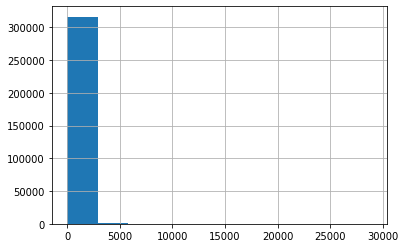

In [ ]:
data['time_spent'].hist()

2. Предыдущая гистограмма выглядит странно, потому что максимальное значение столбца `time_spent` сильно превышает большинство других значений. Измените код, чтобы гистограмма стала более информативной.
Постройте новую гистограмму и увеличьте число корзин до 100.

<Axes: >

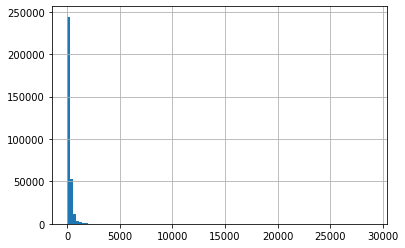

In [ ]:
data['time_spent'].hist(bins = 100)

3. Итак, гистограмма стала более информативной. Можно исключить слишком большие значения времени заправки и посмотреть на остальные.
Используйте параметр range, чтобы изучить распределение значений `time_spent`, находящихся в диапазоне от 0 до 1500. Количество корзин оставьте прежним — 100.


<Axes: >

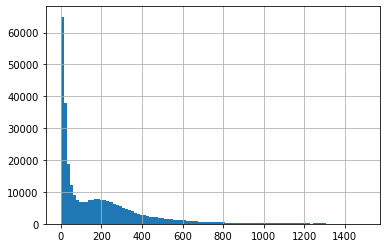

In [ ]:
data['time_spent'].hist(bins = 100, range = (0,1500))

## Диаграмма размаха

Вспомните распределение времени на АЗС, которое получили. 
Ожидаемое распределение времени заправки — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого времени заправки. Однако на графике виден высокий пик около 0. Скорее всего, он имеет иную природу. Это не заправки, а ошибки расчётов, проезды сквозь АЗС или что-то ещё.

Описывая распределение, аналитики рассчитывают среднее арифметическое или медиану. Вычислить их можно методами `mean()` и `median()`. 

Однако, помимо медианы и среднего, важно знать характерный разброс — то, какие значения оказались вдали от среднего и насколько их много.

Самое простое, что можно посчитать для оценки разброса, — это минимальное и максимальное значения. Такое описание не всегда точно, подвержено влиянию выбросов. Гораздо более устойчивая оценка — межквартильный размах.

Квартили (от лат. `quartus` — «четвёртый») разбивают упорядоченный набор данных на четыре части. Первый квартиль `Q1` — число, отделяющее первую четверть выборки: 25% элементов меньше, а 75% — больше него. Медиана — второй квартиль `Q2`, половина элементов больше и половина меньше неё. Третий квартиль `Q3` — это отсечка трёх четвертей: 75% элементов меньше и 25% элементов больше него. 

Межквартильный размах — это расстояние между `Q1` и `Q3`.

Увидеть медиану и квартили в `Python` можно на специальном графике. Его называют диаграммой размаха или «ящиком с усами».

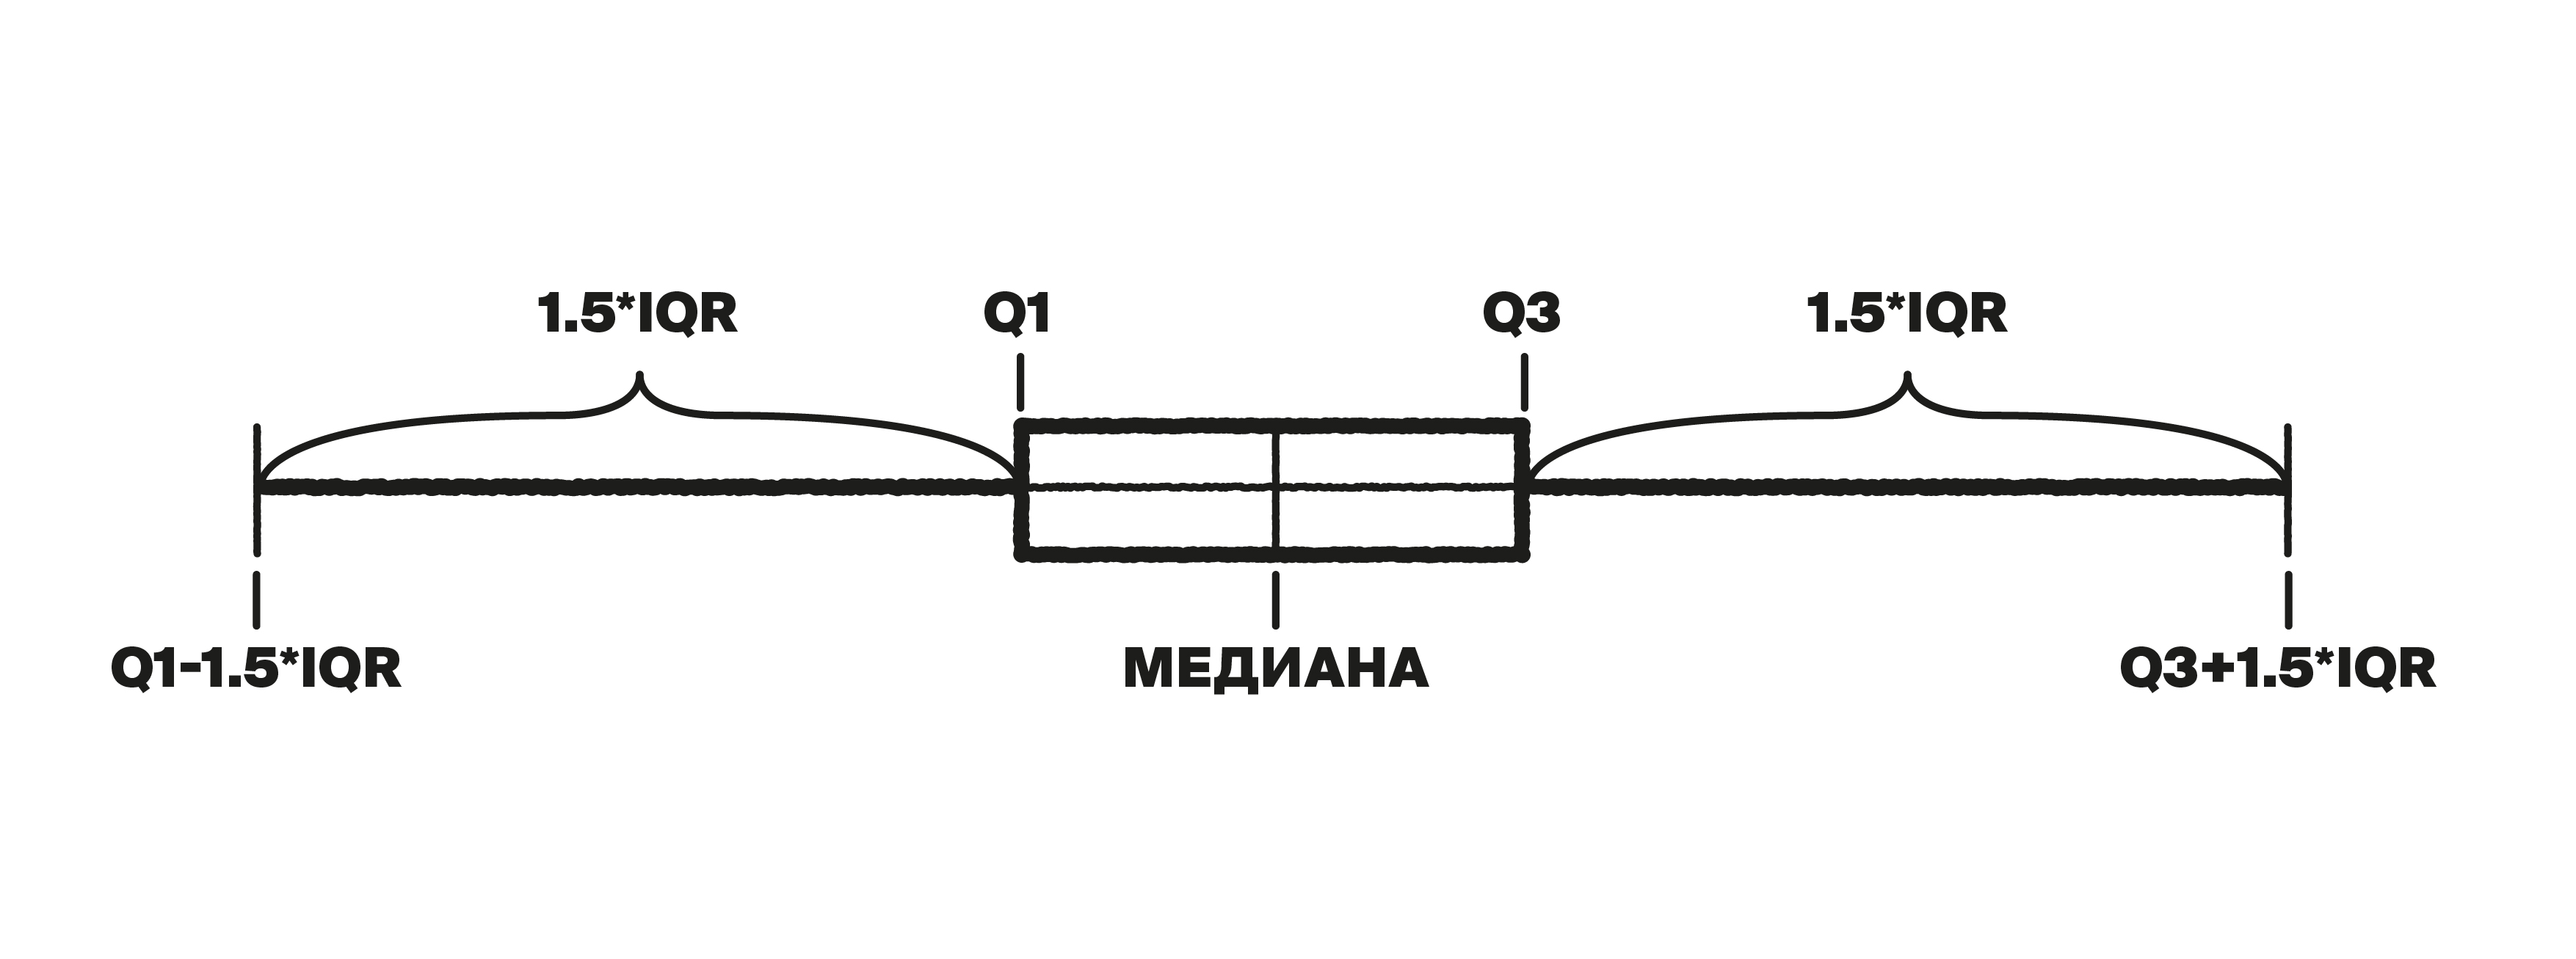

«Ящик» ограничен первым и третьим квартилями. Внутри ящика обозначают медиану.
«Усы» простираются влево и вправо от границ ящика на расстояние, равное 1,5 межквартильного размаха (сокращённо `IQR`, от англ. `interquartile range`, «межквартильный размах»). В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Если правый «ус» длиннее максимума, то он заканчивается максимумом. То же — для минимума и левого «уса».

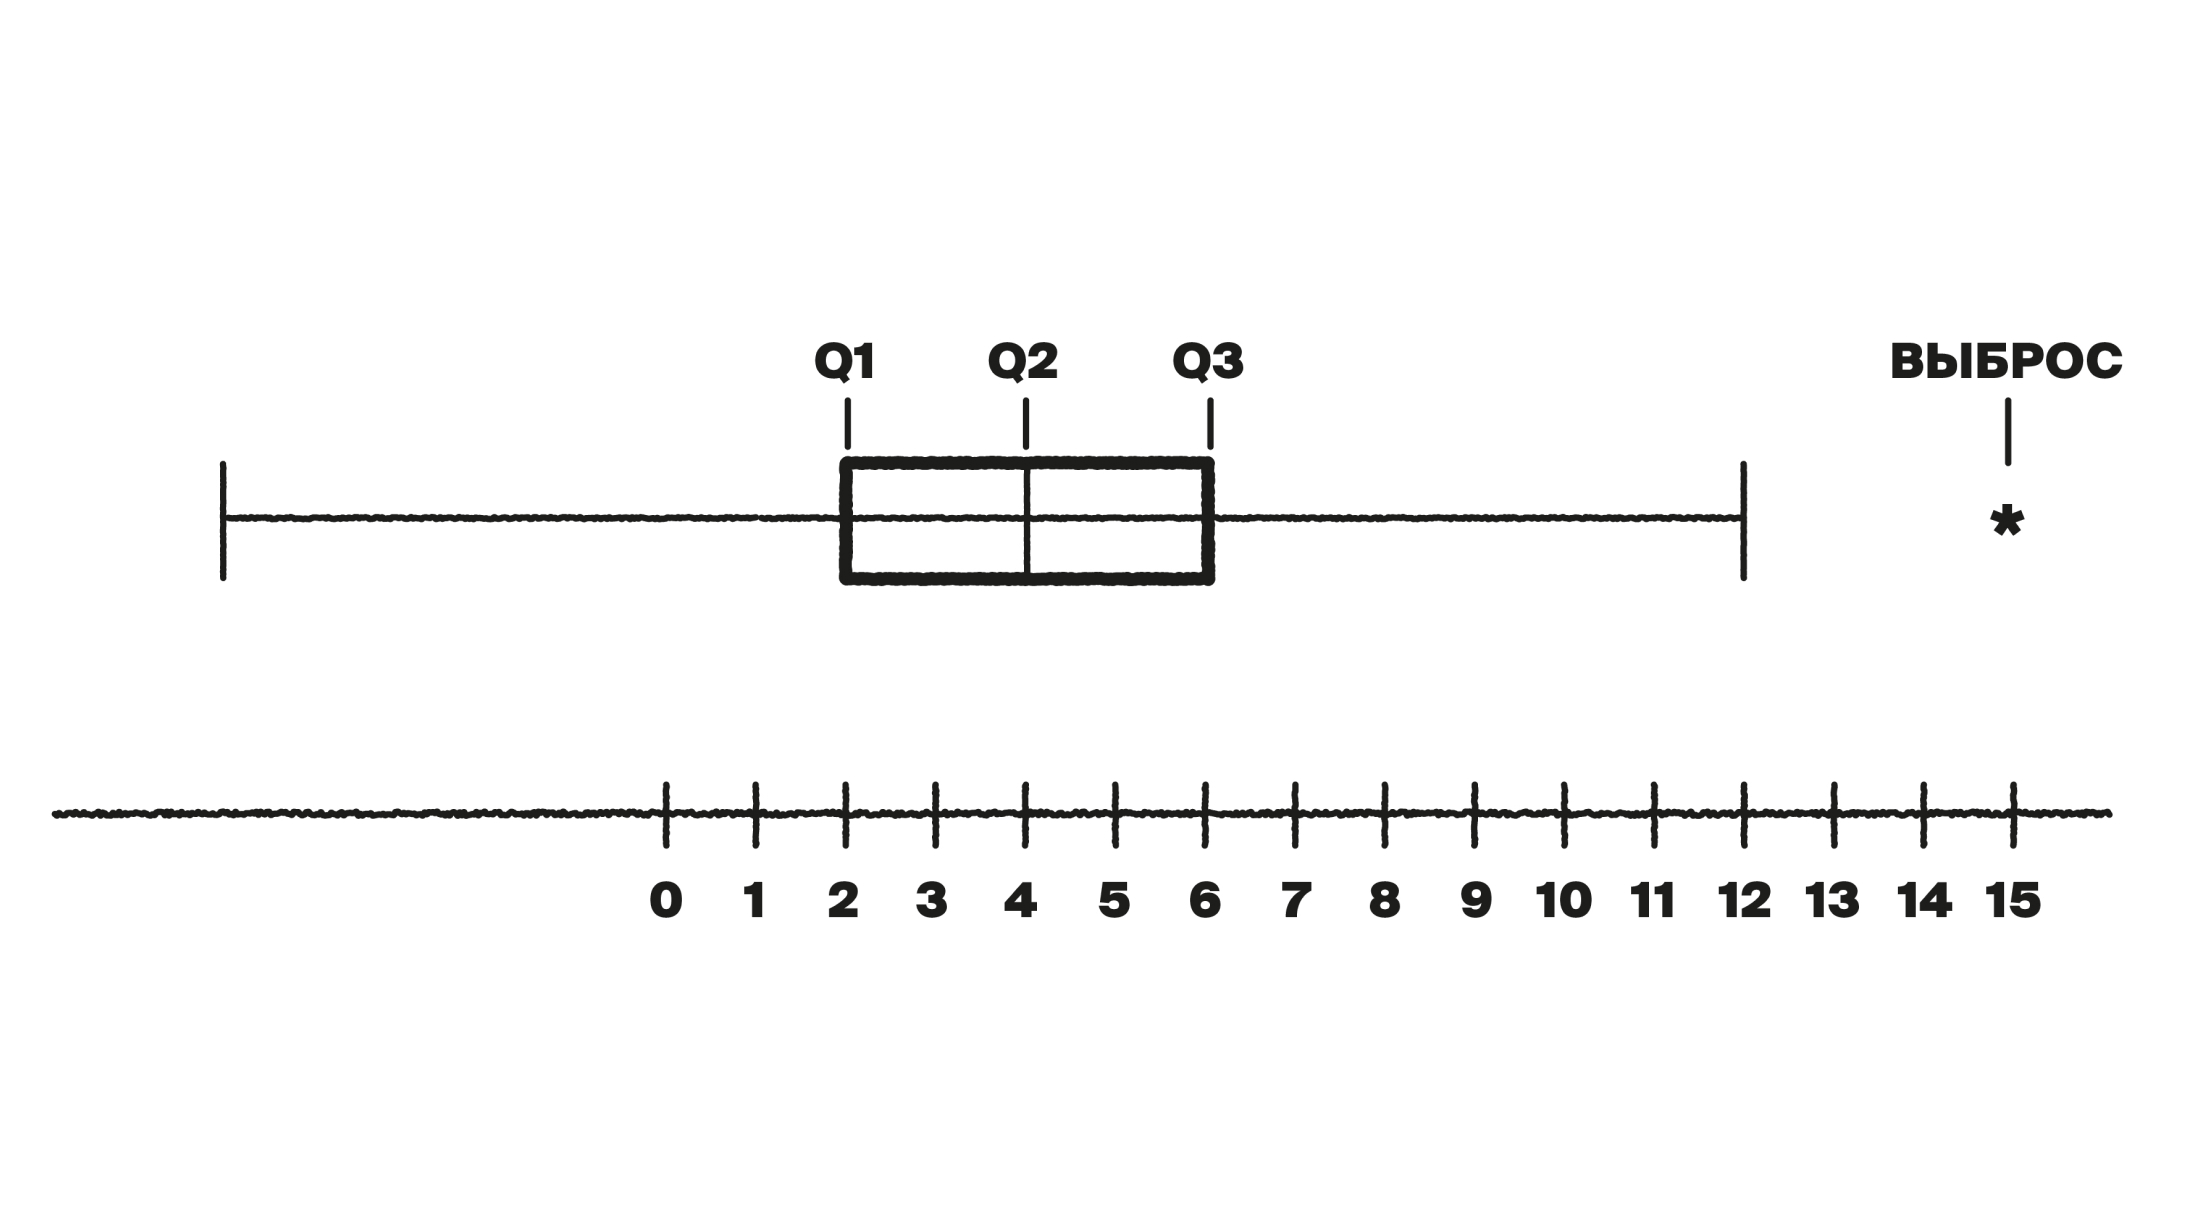

В Python диаграмму размаха строят методом `boxplot()` (от англ. `box-and-whisker plot` — «график „ящик с усами“»).

Нарисуйте диаграмму размаха для `data`, ограничив диапазон по вертикали значениями -100 и 1000.

<Axes: >

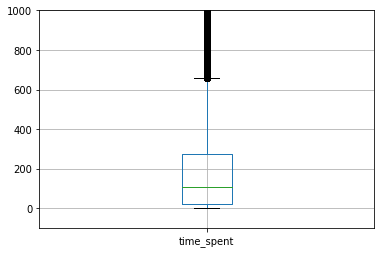

In [ ]:
plt.ylim(-100,1000)
data.boxplot()

Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 650 секунд — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.

И всё же значения, которые отсёк верхний «ус», — редкие. Видно, насколько медиана (зелёная линия) не стремится к длинному хвосту высоких значений.

Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: иметь под рукой среднее, медиану, количество наблюдений в выборке и разброс их значений. Такие характеристики, дающие представление о выборке, входят в числовое описание данных. В `Python` его получают методом `describe()` (пер. «описать, охарактеризовать»). Результат работы метода — список характерных значений. 

Правильно истолковать значения на диаграмме размаха трудно, особенно когда границы оси Y — это 0 и 1000. Можно сравнить числовое описание, которое выдаёт метод `describe()`, с диаграммой размаха. Так вы графически отобразите распределение данных и зафиксируете важные значения в числах. Обратите внимание, что значения 25% и 75% в выдаче метода `describe()` — это `Q1` и `Q3` соответственно.



Примените к таблице `data` метод `describe()` и выведите на экран список характерных значений.

In [ ]:
data.describe()

,time_spent
count,317104.000000
mean,203.382294
std,395.754791
min,0.000000
25%,19.000000
50%,108.000000
75%,274.000000
max,28925.000000


## Срезы данных методом `query()`

Необходимое условие для среза записывается в строке, которую передают как аргумент методу `query()`. А метод применяют к датафрейму. 

Условия, указанные в параметре `query()`:

Поддерживают разные операции сравнения: !=, >, >=, <, <=.

Условия для среза данных можно объединять. 
Проверяют, входят ли конкретные значения в список, конструкцией: `data in ["a", "b"]`. Если нужно узнать, нет ли в списке определённых значений, пишут так: `data not in ["a", "b"]`.

Работают с логическими операторами в привычном виде, где «или» — `or` , «и» — `and`, «не» — `not`. Указывать условия в скобках необязательно. Без скобок операции выполняются в следующем порядке: сначала `not`, потом `and` и, наконец, `or`.

Условия для среза данных можно объединять. 

В условиях допустимы арифметические операции. 

Ещё в `query()` можно включать внешние переменные (не из датафрейма). Когда упоминаете такую переменную, помечайте её знаком `@`

Чтобы проверить наличие конкретных значений в столбце, вызовем метод `isin()`.

Иногда нужно получить выборку, соответствующую сразу нескольким условиям, — для этого существуют логические операции `pandas`. Их синтаксис смотри ниже:

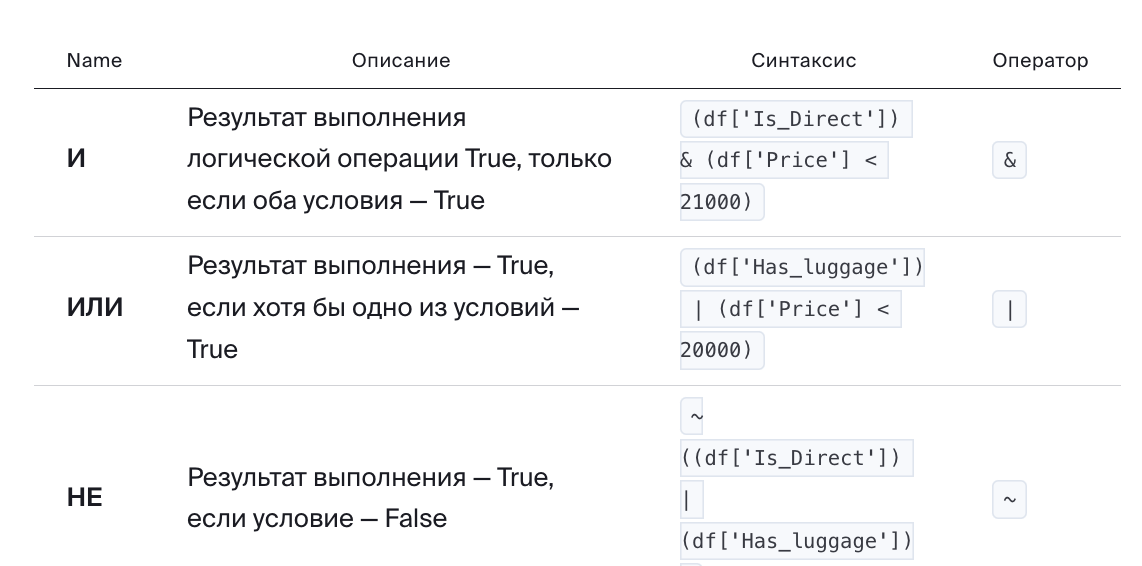

Оператор `~` можно использовать и для проверки одного условия.

Обратите внимание, что здесь условия указывают в скобках — в отличие от синтаксиса логических операций `Python` с `or`, `and` или `not`.

Пора перейти от общего представления о данных к деталям. Откуда взялись короткие заезды на АЗС? А очень долгие? Это характерно для одной АЗС или для всех? Отличаются ли чем-то АЗС со сверхдолгими заправками от других?
Чтобы ответить на эти вопросы, нужны не все данные, а лишь их часть — срез данных. 


1. Итак, нужно разобраться с аномалиями в выборке. Для начала найдите АЗС с самыми большими значениями в столбце `time_spent`. Одной строкой кода упорядочьте столбец `time_spent` по убыванию и выведите на экран первые 10 строк всей таблицы.

In [ ]:
data.sort_values('time_spent', ascending = False).head(10)

,date_time,id,time_spent,name
114797,20180402T055708,3c1e4c52,28925.0,Василёк
27147,20180406T080254,4b5f2af5,28519.0,Немезия
60547,20180408T000002,cf1ba8a5,28292.0,Василёк
19042,20180408T204208,5410e876,23696.0,Василёк
118597,20180408T165020,3c1e4c52,21184.0,Василёк
118058,20180402T111333,3c1e4c52,20359.0,Василёк
114406,20180408T083722,3c1e4c52,19886.0,Василёк
132164,20180405T160745,627ea5e3,19445.0,Левкой
281360,20180406T180459,d0c0928d,18614.0,Пион
165326,20180402T230204,3af3bb71,18569.0,Агератум


2. Четыре из десяти самых долгих заездов произошли на станции под номером `3c1e4c52`. Аналитик данных непременно спросит: «А как распределение времени, проведённого на этой АЗС, соотносится с распределением времени заездов в целом?» Нужно проверить. 

Для этого сделайте срез данных и извлеките всю информацию о станции `3c1e4c52`. Сделайте срез `data` по АЗС с `id == "3c1e4c52"` и сохраните результат в переменную `sample`. Выведите на экран число заездов на эту АЗС.

In [ ]:
sample = data[data['id'] == "3c1e4c52"]
sample

,date_time,id,time_spent,name
112900,20180408T140822,3c1e4c52,55.0,Василёк
112901,20180404T120827,3c1e4c52,113.0,Василёк
112902,20180405T155422,3c1e4c52,2683.0,Василёк
112903,20180403T134959,3c1e4c52,14.0,Василёк
112904,20180405T050229,3c1e4c52,353.0,Василёк
...,...,...,...,...
118709,20180404T040613,3c1e4c52,179.0,Василёк
118710,20180404T213235,3c1e4c52,1604.0,Василёк
118711,20180404T091754,3c1e4c52,37.0,Василёк
118712,20180404T101710,3c1e4c52,13.0,Василёк


3. Нужно сравнить распределение времени пребывания на станции `3c1e4c52` с распределением времени пребывания на всех АЗС. Если они сильно различаются, возможно, станция `3c1e4c52` представляет собой статистический выброс. Методом `hist()` постройте две гистограммы распределения значений в столбце `time_spent`: одну для объекта `data`, вторую — для `sample`. Не забудьте использовать `plt.show()` после каждого вызова `hist()`. Для обеих гистограмм задайте одинаковые аргументы: `range` — от 0 до 1500, `bins` — 100.

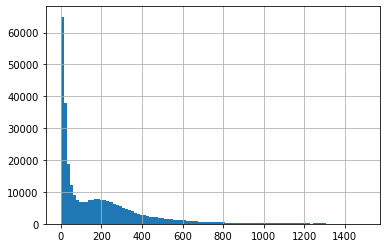

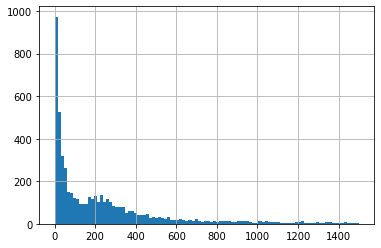

In [ ]:
data['time_spent'].hist(bins = 100, range = (0,1500))
plt.show()
sample['time_spent'].hist(bins = 100, range = (0,1500))
plt.show()

Нетипично долгие заезды признаем выбросами и отбросим. Почему так можно?
Во-первых, их немного. Во-вторых, скорее всего, такие заезды — не заправки. Например, водитель мог отдыхать, есть или заниматься чем-то ещё. Раз это не заправки в чистом виде, значит, в рамках нашего исследования такие заезды не интересны.
Как определить, что заправка «слишком долгая»? Где провести границу между заправкой автомобиля и прочими занятиями на АЗС?
Посмотрите на гистограмму.

Заправки продолжительностью 600 секунд — уже редки. Дольше 800 секунд почти не заправляются. А на участке более 1300 секунд гистограмма сливается с нулём (это не значит, что там ровно 0, но таких заправок единицы).
Примем верхнюю границу в 1000 секунд. Это число кажется разумным: дольше заправляются редко. Если отбросить значения больше 1000, много данных не потеряется. Да и вряд ли водители тратят на заправку больше 1000 секунд (16 минут).
Решено. Продолжаем работать с наблюдениями, удовлетворяющими условию: `data.query('time_spent < 1000')`.



1. Причиной коротких заездов может быть то, что водители нечаянно заезжают на АЗС, которые не работают по ночам. Если это действительно так, то вы увидите связь между короткими заездами и временем прибытия. Чтобы проверить эту гипотезу, измените тип столбца `date_time` на более удобный тип для даты. 

Методом `pd.to_datetime()` переведите значения столбца `date_time` в таблице `data` в объекты `datetime`. В параметре `format=` укажите строку, соответствующую текущему формату `date_time`, с помощью специальных обозначений. Выведите на экран первые пять строк `data`, чтобы проверить, что получилось.

In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'], format = '%Y%m%dT%H%M%S' )
data.head(10)

,date_time,id,time_spent,name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк
5,2018-04-03 14:42:34,76144fb2,5.0,Василёк
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк
8,2018-04-04 08:47:11,76144fb2,14.0,Василёк
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк


2. Напомним, что в датафрейме записано время UTC. Московское рассчитывают как UTC + 3 часа. Создайте столбец `data['local_time']` и сохраните в нём сдвинутое на 3 часа время из столбца `data['date_time']`. Напечатайте первые 5 строк таблицы `data`.

In [ ]:
data['local_time'] = data['date_time'] + pd.Timedelta(hours = 3)
data.head(5)

,date_time,id,time_spent,name,local_time
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49


3. Данные, связанные со временем, лучше округлять до той величины, которой будет достаточно для детального анализа. Чтобы проанализировать взаимосвязь между временем прибытия на АЗС и продолжительностью заезда, точность до минут и секунд не нужна. 

Округлите время до часов. Выполните следующие шаги: Создайте новый столбец `date_hour` и передайте ему значения столбца `local_time`, округлённые до часов. Выведите первые пять строк `data`, чтобы проверить результаты.

In [ ]:
data['date_hour'] = data['local_time'].dt.round('1H')
data.head(5)

,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00


Снова создайте переменную `sample`, записав в неё срез из данных по АЗС с `id == '3c1e4c52'`. Обратите внимание, что на этот раз в `sample` войдут все форматы времени. 

Пользуясь данными `sample`, постройте график зависимости продолжительности заправки от времени заезда. За основу возьмите соответствующие столбцы `time_spent` и `local_time`. 

Оси `X` присвойте значения столбца `local_time`, а оси `Y` — значения столбца `time_spent`. Проверьте, всё ли верно отображено на графике: Каждый элемент обозначен точкой. Диапазон оси `Y` указан от 0 до 1000. Добавлены сетки. Размер графика 12х6 дюймов.

<Axes: xlabel='local_time'>

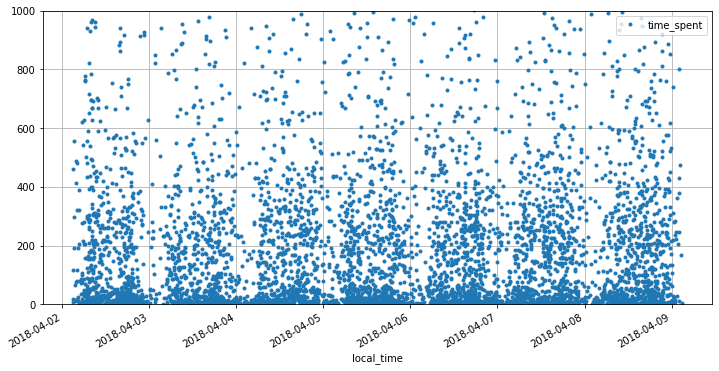

In [ ]:
sample = data[data['id'] == '3c1e4c52']
sample.plot(x ='local_time', y = 'time_spent', style = '.', ylim = (0,1000), grid = True, figsize = (12,6))  

Вернёмся к данным по АЗС. На графике слишком много точек. Чтобы сделать его нагляднее, будем отмечать не визит, а среднюю продолжительность заправки в час. Вы уже создавали столбец `date_hour` с округлённым временем заезда на АЗС.

Обратимся к `pivot_table()`. Добавим сводную таблицу в цепочку между `query()` и `plot()` для АЗС с `id == "3c1e4c52"`:

In [ ]:
data.query('id == "3c1e4c52"').pivot_table(index = 'date_hour', values = 'time_spent')

,time_spent
date_hour,
2018-04-02 03:00:00,983.333333
2018-04-02 04:00:00,173.538462
2018-04-02 05:00:00,291.071429
2018-04-02 06:00:00,875.320000
2018-04-02 07:00:00,493.089286
...,...
2018-04-08 23:00:00,542.425000
2018-04-09 00:00:00,418.086957
2018-04-09 01:00:00,422.083333


<Axes: xlabel='date_hour'>

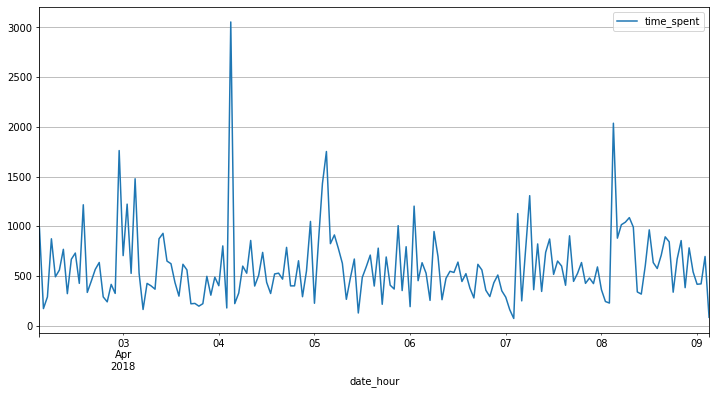

In [ ]:
data.query('id == "3c1e4c52"').pivot_table(index = 'date_hour', values = 'time_spent').plot(grid = True, figsize = (12,6))  

На графике показана средняя продолжительность заправки на АЗС под номером `3c1e4c52` за каждый час. Обратите внимание, что в среднем водители проводят на АЗС около 500 секунд. Помня о пике гистограммы в 200 секунд, нельзя не удивиться такому значению!

Есть и таинственный пик, когда среднее время заправки достигло 3000 секунд (почти час). Многовато.  Заезды дольше 1000 секунд не слишком похожи на правду. Добавим соответствующее условие в `query()`:

<Axes: xlabel='date_hour'>

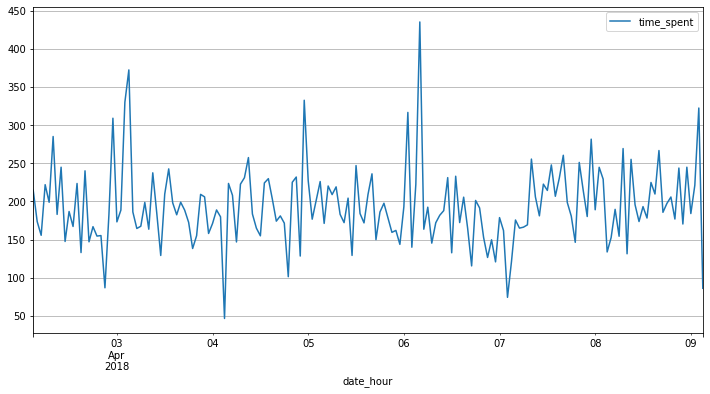

In [ ]:
data.query('id == "3c1e4c52" and time_spent < 1000').pivot_table(index = 'date_hour', values = 'time_spent').plot(grid = True, figsize = (12,6))  

Средняя продолжительность заправки снизилась вполовину! Вот вы и увидели, как выбросы влияют на среднее.

Вычислим устойчивую к выбросам медиану. В `pivot_table()` значением параметра `aggfunc` передадим `median` и построим график средней продолжительности заездов на АЗС под номером `3c1e4c52` за каждый час.
Напомним, что в `aggfunc` передают функцию, которую применяют к значениям сводной таблицы. Например, метод `count` посчитает число значений в группе. Если в `aggfunc` не указать ничего, отработает расчёт среднего: `mean`.

<Axes: xlabel='date_hour'>

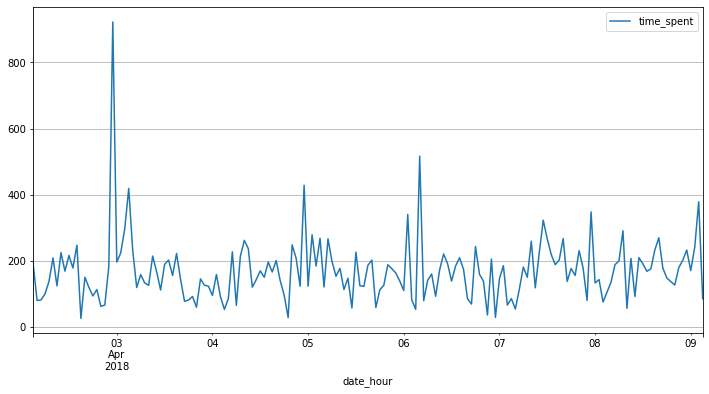

In [ ]:
data.query('id == "3c1e4c52"').pivot_table(index = 'date_hour', values = 'time_spent', aggfunc = 'median').plot(grid = True, figsize = (12,6))  

Обратите внимание, что даже без фильтра `time_spent < 1000` медиана дала среднюю продолжительность заправки примерно в 200 секунд. Медиана устойчива к выбросам, но всё же не безупречна: пик более 800 секунд в ночь со 2 на 3 апреля выглядит аномальным значением.

В целом нет никакой явной связи между продолжительностью заезда и временем дня. Это странно. На этой АЗС не бывает очередей? Или что-то не так с данными? Число заездов в течение дня точно должно меняться. Проверьте это.

Если между временем прибытия на АЗС и числом заездов нет никакой связи, это серьёзный повод насторожиться. Вряд ли количество заездов в два часа ночи и в восемь утра одинаково. Чтобы понять, что же происходит, постройте график зависимости между временем прибытия и количеством заездов в час.
Выполните следующие шаги, помня о бритве Оккама:
1.	Сделайте срез из `data` по АЗС с `id=="3c1e4c52"`.
2.	Из данных этого среза постройте сводную таблицу, которая будет отображать количество заездов по времени прибытия.
3.	Из данных этой таблицы постройте график зависимости между временем прибытия (ось `X`) и количеством заездов в час (ось `Y`). Добавьте линии сетки, задайте размер графика 12х5 дюймов.

<Axes: xlabel='date_hour'>

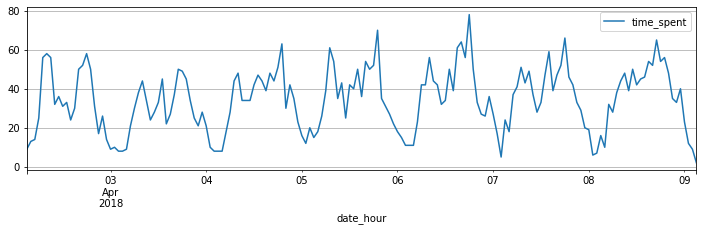

In [ ]:
data.query('id == "3c1e4c52"').pivot_table(index = 'date_hour', values = 'time_spent', aggfunc = 'count').plot(grid = True, figsize = (12,3))  

Продолжительность заправки около 0 секунд всё ещё выглядит необъяснимо странной. Неужели такие заезды придётся отбросить? Это уже было сделано с подозрительно долгими заправками, признанными выбросами. Однако сверхкоротких заездов гораздо больше, чем очень долгих. Если от них избавиться, то данные наверняка сильно исказятся. Как много строк потеряется, если просто отбросить подозрительно короткие события? 

Посчитаем долю заездов на АЗС продолжительностью менее 60 секунд:

In [ ]:
len(data.query('time_spent < 60'))/len(data)

0.42213910893586964

Таких аномально быстрых заездов 42%. Очень много.
Насколько равномерно они распределены по разным АЗС? Везде около 40%? Или где-то их нет, а на каких-то АЗС много? Выясните, откуда взялось такое среднее. Найдите для каждой АЗС среднее число аномально быстрых заездов. Пометьте их и сгруппируйте данные по АЗС. И по этим значениям уже постройте гистограмму.

1. Первым делом нужно создать переменную, чтобы выделить аномально быстрые заезды. Добавьте в таблицу `data` столбец `too_fast` (пер. «слишком быстрый») со значениями: `True` — если продолжительность заезда из столбца `time_spent` менее 60 секунд. `False` — все остальные значения. Затем выведите на экран первые пять строк таблицы `data`, чтобы проверить новый столбец.

In [ ]:
data['too_fast'] = data['time_spent'] < 60
data.head()

,date_time,id,time_spent,name,local_time,date_hour,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 20:39:13,2018-04-04 21:00:00,True
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 10:04:41,2018-04-07 10:00:00,True
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 16:20:49,2018-04-04 16:00:00,True


2. Рассчитать процент всех заездов короче 60 секунд можно разными способами. Можно посчитать значения `True` в столбце `too_fast` методом `value_counts()` и разделить получившееся число на количество строк.

Другой способ — применить к столбцу `too_fast` метод `mean()`. Ведь среднее рассчитывают так: сумму значений делят на количество значений. Если применить арифметическую операцию к булевым значениям `True` и `False`, значение `True` будет интерпретировано как 1, а `False` — как 0. С помощью `mean()` можно сделать оба вычисления сразу: посчитать `True` и разделить его на количество строк.

Таким образом, найти процент быстрых заездов можно с помощью среднего арифметического.

Рассчитайте среднее арифметическое для значений в столбце `too_fast` и выведите его на экран.

In [ ]:
data['too_fast'].mean()

0.42213910893586964

3. Переменная задана, процент посчитан, теперь можно группировать данные по АЗС. Для этого воспользуйтесь сводной таблицей.

Создайте переменную `too_fast_stat` и запишите в неё значения из сводной таблицы, сгруппировав доли быстрых заездов по АЗС.

Выведите на экран первые пять строк `too_fast_stat`.

In [ ]:
too_fast_stat = data.pivot_table(index = 'id', values = 'too_fast')
too_fast_stat.head()

,too_fast
id,
00ca1b70,0.250000
011f7462,0.637489
015eaddd,0.726190
0178ce70,0.211538
018a83ef,0.510269


4. Теперь вы знаете, сколько быстрых заездов на первых пяти АЗС в процентном отношении. Но что делать дальше — выводить на экран остальные 466 строк и изучать значения для каждой АЗС? Слишком сложно.

Гораздо лучше визуализировать распределение быстрых заездов сразу по всем АЗС. Гистограмма, вот что нужно!

Постройте гистограмму распределения значений в таблице `too_fast_stat` на 30 корзин.

<Axes: >

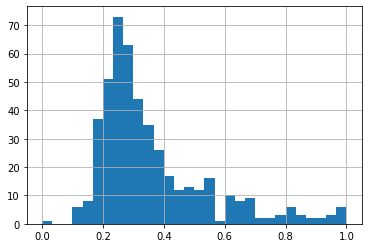

In [ ]:
too_fast_stat['too_fast'].hist(bins = 30)

5.
Теперь, когда вы разобрались, как использовать булевы значения для подсчёта процентов, примените этот метод для аномально долгих заправок — проверьте их распределение по АЗС. Как вы помните, заезды длиннее 1000 секунд решили исключить. Сейчас станет понятно, сколько АЗС это затронет.

Добавьте в `data` столбец `too_slow` (пер. «слишком медленный»), в котором значения из столбца `time_spent` больше 1000 секунд будут отмечены как `True`, а все остальные — как `False`.

Создайте сводную таблицу с процентом медленных заездов для каждой АЗС.

Постройте гистограмму доли медленных заездов по всем АЗС на 30 корзин.

array([[<Axes: title={'center': 'too_slow'}>]], dtype=object)

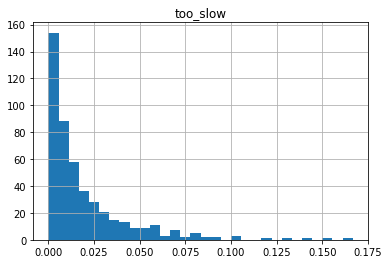

In [ ]:
data['too_slow'] = data['time_spent'] > 1000
too_slow_stat = data.pivot_table(index = 'id', values = 'too_slow')
too_slow_stat.hist(bins = 30)

1.
Проблема: в выборке есть АЗС, на которых длительность большинства заездов короче 60 секунд.

Что нужно сделать: исключить эти АЗС из анализа. Так будет меньше шансов получить необъективные результаты, поскольку коротких заездов в целом больше всего.

Правило: исключаются из анализа те АЗС, на которых длительность половины или более заездов короче 60 секунд. Если бы вы писали отчёт, это предложение непременно вошло бы в него.

Примените правило на практике. Сначала из таблицы `too_fast_stat` получите `id` станций, которые не нарушают правило. Затем используйте эти `id`, чтобы отфильтровать таблицу `data`.
Для этого выполните следующие шаги:
1.	Создайте переменную `good_ids` и поместите в неё те строки из `too_fast_stat`, где `too_fast` меньше 50%. Не забывайте, что в таблице `data too_fast` является булевым значением и атрибутом заезда, но в таблице `too_fast_stat` `too_fast` — это процент заездов, длительность которых короче 60 секунд, и атрибут заправочной станции.
2.	Создайте переменную `good_data` и поместите в неё те строки из `data`, где в `good_ids.index` находится `id`. Другими словами, соберите все заезды, не нарушающие правило.
3.	Распечатайте число строк в `data`, а затем и число строк в `good_data`.

In [ ]:
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = data.query('id in @good_ids.index')
print(len(data))
print(len(good_data))

317104
229095


2.
Проблема: в выборке есть аномально быстрые и аномально медленные заезды. Скорее всего, их совершали не те, кто приезжал просто заправиться.

Что нужно сделать: исключить эти заезды из анализа, чтобы получить более точные показатели. Аномальные значения могут влиять на средние значения и медианы.

Правило: заезды, длительность которых короче 60 секунд и длиннее 1000 секунд, исключаются из анализа — это предложение тоже вошло бы в отчёт.

Примените новое правило и получите выборку без аномальных заездов.
Выполните следующие шаги:
1.	С помощью функции `query()` обновите таблицу `good_data`, выбрав строки, где `time_spent` в диапазоне между 60 и 1000 секунд. Убедитесь, что заезды длительностью по 60 и 1000 секунд тоже включены.
2.	Выведите на экран число строк в обновлённой `good_data`.

In [ ]:
good_data =  data.query('id in @good_ids.index and time_spent >= 60 and time_spent <= 1000')
len(good_data)

154601

3.
В предыдущих задачах вы выбросили из набора данных отдельные заезды и даже целые АЗС ради более реалистичной оценки. Проверьте, помогло ли это. Постройте гистограмму распределения медианной длительности заправки по всем АЗС.
Выполните следующие шаги:
1.	Создайте переменную `good_stations_stat` и поместите в неё данные из таблицы с медианными значениями `time_spent` по каждой АЗС. Не забудьте рассчитать медианы по `good_data`.
2.	Постройте гистограмму на 50 корзин по этим медианным значениям.

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

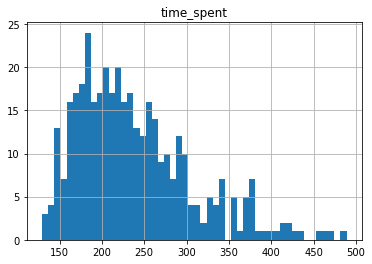

In [ ]:
good_stations_stat = good_data.pivot_table(index = 'id', values = 'time_spent', aggfunc= 'median')
good_stations_stat.hist(bins = 50)

4.
Как вы помните, цель вашего анализа — определить сети заправок, где водители задерживаются надолго. Рассчитайте медианную продолжительность заезда для каждой сети и выведите на экран список в порядке возрастания.
Выполните следующие шаги:
1.	Создайте переменную `good_stat` и поместите в неё данные из таблицы с медианными значениями `time_spent` по каждой сети. Не забудьте рассчитать медианы по `good_data`.
2.	Выведите на экран таблицу `good_stat`, отсортировав её по возрастанию медианного времени.

In [ ]:
good_stat = good_data.pivot_table(index = 'name', values = 'time_spent', aggfunc= 'median').sort_values('time_spent')
good_stat

,time_spent
name,
Белоцветник,154.0
Бальзамин,158.0
Незабудка,161.0
Колокольчик,161.0
Обриета,167.0
Функия,171.5
Гацания,178.5
Аммобиум,180.5
Пион,180.5


Мы смело выбросили неправдоподобные наблюдения.
Сравним с тем временем, что было раньше. Построим две гистограммы: по исходным данным `raw` (пер. «необработанный, сырой») и новым `filtered` (пер. «отфильтрованный»).

<Axes: ylabel='Frequency'>

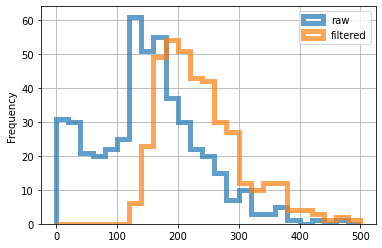

In [ ]:
median_station_stat = data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)
good_stations_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median'
)

ax = median_station_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw',
)
good_stations_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,
) 


Выглядят непривычно. Всё из-за ряда новых параметров:

•	`histtype` (от англ. `the type of histogram` — «тип гистограммы»). В параметре указывают тип гистограммы, по умолчанию — это столбчатая (закрашенная). Значение `step` (пер. «шаг») чертит только линию.

•	`linewidth` (от англ. `width of line` — «толщина линии»). Задаёт толщину линии графика в пикселях.

•	`alpha` (от термина «альфа-канал»). Назначает густоту закраски линии. 1 — это 100%-я закраска; 0 — прозрачная линия. С параметром 0.7 линии чуть прозрачны, так виднее их пересечения.

•	`label` (пер. «ярлык», «этикетка»). Название линии.

•	`ax` (от англ. `axis` — «ось»). Метод `plot()` возвращает оси, на которых был построен график. Чтобы обе гистограммы расположились на одном графике, сохраним оси первого графика в переменной `ax`, а затем передадим её значение параметру `ax` второго `plot()`. Так, сохранив оси одной гистограммы и построив вторую на осях первой, мы объединили два графика.

•	`legend` (пер. «легенда»). Выводит легенду — список условных обозначений на графике. На графике вы можете найти её в верхнем правом углу.

Оставшиеся параметры `y`, `range`, `bins`, `grid` хорошо вам известны и не нуждаются в дополнительном представлении.

Разобравшись, как получились две гистограммы, сравним их. Видно огромное различие на малых временах. В «сырых» данных есть большая группа АЗС с продолжительностью заправки менее 50 секунд. В отфильтрованных ничего подобного — вы сами отбросили АЗС с заездами короче 60 секунд. На самой «быстрой» АЗС в отфильтрованных данных заправляются дольше 100 секунд, а типичная продолжительность заправки около 200. Такое распределение больше похоже на правду, чем исходная гистограмма. Отсеяв всё лишнее и нереалистичное, вы проделали хорошую работу.



Чтобы быть уверенными в данных, пришлось удалить почти 52% заездов на АЗС. Теперь посмотрите, как «типичные» средняя и медианная длительности заправки различаются в зависимости от данных: сырых или отфильтрованных. Для этого выведите на экран одну таблицу, в которой для каждой сети АЗС будут показаны средняя длительность заправки из сырых данных из таблицы `stat` и медианная длительность заправки из отфильтрованных данных из таблицы `good_stat`.

Выполните следующие шаги:
1.	Создайте в таблице `stat` новый столбец `good_time_spent` с медианной длительностью заправки, рассчитанной по отфильтрованным данным из таблицы `good_stat`.
2.	Выведите на экран таблицу `stat` и сравните показатели.

In [ ]:
stat = data.pivot_table(index = 'name', values = 'time_spent')
good_stat = good_data.pivot_table(index = 'name', values = 'time_spent', aggfunc='median')

stat['good_time_spent'] = good_stat['time_spent']
stat.head()

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0


В одном вызове `pivot_table` можно передать параметру `aggfunc` cписком сразу несколько функций. Например, `aggfunc=['median', 'count']` посчитает и медиану, и число значений — в результирующей таблице они будут в соседних столбцах.
Кроме числа заездов на АЗС, можно добыть и название сети из столбца name. Если передать в `pivot_table` аргумент `index='id'`, то будут сгруппированы данные с совпадающим `id`. Значит, у всех будет одинаковое имя сети `name` (ведь одна АЗС приписана строго к одной сети). Нужно выбрать любую из строк, например первую, передав значение `first` параметру `aggfunc`.

Пора посмотреть, как заезды распределяются внутри сетей. Для этого про каждую АЗС нужно знать следующее: к какой сети она относится и сколько раз в общей сложности на неё заезжали. Для начала создайте таблицу с этой информацией.
Выполните следующие шаги:
1.	Создайте переменную `id_name`, которая для каждой АЗС хранит информацию о названии сети и общем числе заездов. Используйте `good_data`, чтобы создать эту таблицу.
2.	Выведите на экран первые пять строк `id_name`.

In [ ]:
id_name = good_data.pivot_table(index = 'id', values = 'name', aggfunc= ['first', 'count'])
id_name.head()

,first,count
,name,name
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157


Облегчите себе анализ и жизнь, избавившись от двухэтажных названий столбцов. Сделайте их одноэтажными и переименуйте.
Выполните следующие шаги:
1.	Измените названия столбцов в `id_name` на `name` и `count`.
2.	Выведите на экран первые пять строк датафрейма, чтобы проверить результат.

In [ ]:
id_name.columns = ['name', 'count']
id_name.head()

,name,count
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157


Разобравшись с работой `merge()` и `join()`, примените их к таблицам `id_name` и `good_stations_stat`.

1.
Предупреждаем, сейчас будет запутанно. Мы рассчитывали медианы по АЗС. Теперь нужно рассчитать медиану этих медиан по каждой сети. Это даст ещё один показатель «типичной» медианной длительности заездов в каждой сети: медиану распределения медианной длительности заездов на АЗС.

Из этого распределения медиан нужно будет исключить медианные значения, рассчитанные для АЗС с совсем небольшим числом заездов. 

Создайте таблицу со статистикой по АЗС, с помощью которой выявите и отфильтруйте эти лишние станции.

Выполните следующие шаги:
1.	Создайте переменную `station_stat_full`, которая для каждой АЗС хранит название сети, число заездов и лучший показатель медианной длительности заправки. 

Подсказка: название сети и число заездов есть в `id_name`, а лучший показатель медианной длительности заправки — в `good_stations_stat`. Объедините эти две таблицы.
2.	Выведите на экран первые 5 строк, чтобы посмотреть новую таблицу.

In [ ]:
good_stations_stat.head()

,time_spent
id,
00ca1b70,166.0
0178ce70,234.5
01abf4e9,181.5
030a9067,135.5
03740f2d,289.0


In [ ]:
station_stat_full = id_name.join(good_stations_stat)
station_stat_full.head()

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


2.
В статистике такое часто бывает: суммарные значения, полученные из малого количества данных, оказываются ненадёжными. Представьте, что вы вернулись к сырым данным и рассчитали медианное значение длительности для десяти случайно выбранных заездов. А потом повторили эту процедуру двадцать раз. Разброс этих двадцати медианных значений практически гарантированно будет гораздо больше, чем в том случае, если бы вы каждый раз случайным образом выбирали по сто заездов.

Медианные значения, относящиеся к небольшому числу заездов, тоже могут быть ненадёжными — их лучше удалить. Но для начала посмотрите, как число заездов распределяется по АЗС.

Выполните следующие шаги:
1.	Используя данные из `station_stat_full`, постройте гистограмму числа заездов на 30 корзин.
2.	Постройте вторую гистограмму по тем же данным, но теперь задайте диапазон от 0 до 300 заездов.
3.	Сравните полученные гистограммы.

array([[<Axes: title={'center': 'count'}>]], dtype=object)

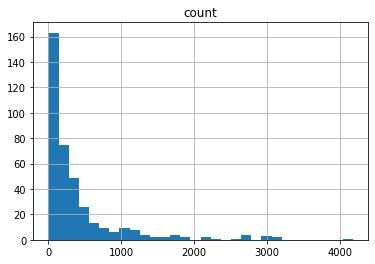

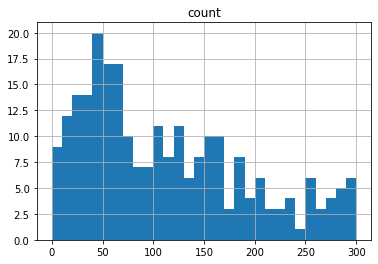

In [ ]:
station_stat_full.hist('count',bins=30)
station_stat_full.hist('count',bins=30, range = (0,300))

3.
Изучив построенные гистограммы, вы решили исключить те АЗС, на которые в течение семи дней заезжали 30 или менее раз. Для этого нужно найти в таблице `station_stat_full` АЗС с числом заездов больше 30, сгруппировать их по названию сети и рассчитать медиану медианных значений. Как вы помните, медианные значения в таблице `station_stat_full` — это медианная длительность заправок по АЗС. Чтобы получить значение по каждой сети, возьмите медиану этих медиан.

Выполните следующие шаги:
1.	Не прибегая к вспомогательной переменной, сделайте срез данных из таблицы `station_stat_full` — так вы найдёте все строки, где число заездов больше 30. Для каждой сети рассчитайте медиану медианного времени заезда на АЗС, а также число АЗС, из которых складывается эта новая медиана. Сохраните результат в переменной `good_stat2`.
2.	Измените названия столбцов в таблице `good_stat2` на `median_time` и `stations`.
3.	Выведите на экран первые пять строк `good_stat2`.

In [ ]:
good_stat2 = station_stat_full.query('count > 30').pivot_table(index = 'name', values = 'time_spent', aggfunc=['count','median'])
good_stat2. columns = ['stations','median_time']
good_stat2.head()

,stations,median_time
name,,
Агератум,3,308.50
Амарант,5,169.00
Аммобиум,4,178.75
Арктотис,3,190.50
Астильба,4,435.50


4.
Снова вызовите таблицу `stat`, которую вы создали несколько уроков назад. Вы использовали её, чтобы посмотреть, насколько различаются два показателя «типичной» длительности заправки: среднее время заправки, полученное из сырых данных, и медианное время заправки, полученное из отфильтрованных данных. Теперь у вас есть третий показатель. Внесите его в эту таблицу и посмотрите на результаты.
Выполните следующие шаги:
1.	Добавьте `good_stat2` в `stat` и сохраните получившуюся таблицу под именем `final_stat`.
2.	Выведите на экран `final_stat` полностью и сравните показатели.

In [ ]:
stat.head()

,time_spent,good_time_spent
name,,
Агератум,337.802721,309.0
Амарант,132.760012,187.5
Аммобиум,256.708042,180.5
Арктотис,73.879984,185.0
Астильба,376.143149,423.0


In [ ]:
# считаем показатели сетей из показателей АЗС, а не усреднённые заезды на все АЗС сети
final_stat = stat.join(good_stat2)
final_stat.head()

,time_spent,good_time_spent,stations,median_time
name,,,,
Агератум,337.802721,309.0,3.0,308.50
Амарант,132.760012,187.5,5.0,169.00
Аммобиум,256.708042,180.5,4.0,178.75
Арктотис,73.879984,185.0,3.0,190.50
Астильба,376.143149,423.0,4.0,435.50


Постройте график по данным из `station_stat_full`, где для каждой АЗС будет 

1.   Новый пункт
2.   Новый пункт

отдельная точка: по горизонтальной оси — число заездов на АЗС, по вертикальной — медианное время заправки. Добавьте линии сетки.

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='count', ylabel='time_spent'>

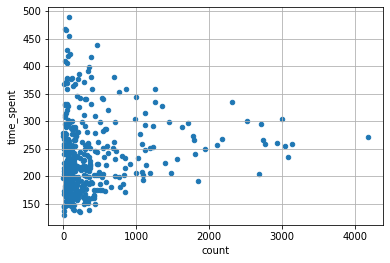

In [ ]:
# считаем данные по отдельным АЗС и по сетям
station_stat_full.plot(x = 'count', y = 'time_spent', kind = 'scatter', grid = True)

По данным из таблицы `station_stat_full` посчитайте коэффициент корреляции Пирсона между числом заездов на АЗС и временем заправки. Коэффициент выведите на экран.

In [ ]:
# считаем корреляцию по отдельным АЗС и по сетям
station_stat_full['count'].corr(station_stat_full['time_spent'])

0.12242632473597156

Создайте переменную `station_stat_multi`, где для каждой АЗС будет 3 числа:

1) среднее (не медиана) продолжительности заезда на АЗС;

2) средняя доля быстрых заездов;

3) средняя доля медленных заездов.

Распечатайте матрицу корреляции между этими величинами. Постройте диаграмму рассеяния попарно для всех величин методом `scatter_matrix()`. Задайте размер 9х9 дюймов.

In [ ]:
station_stat_multi = data.pivot_table(index = 'id', values = ['time_spent', 'too_fast', 'too_slow'])
station_stat_multi.corr()

,time_spent,too_fast,too_slow
time_spent,1.000000,-0.640658,0.802247
too_fast,-0.640658,1.000000,-0.255876
too_slow,0.802247,-0.255876,1.000000


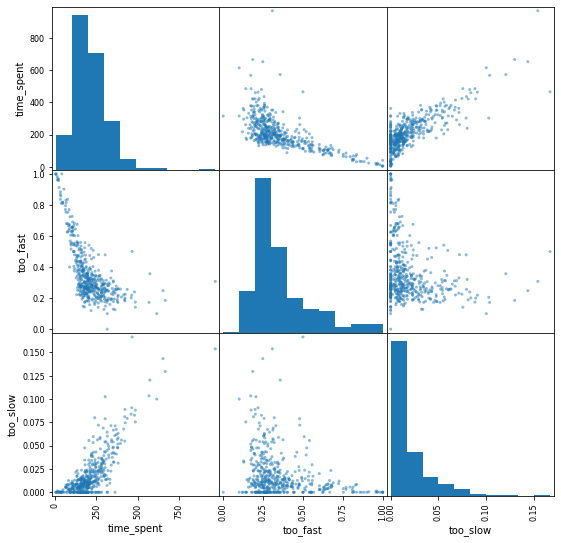

In [ ]:
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9,9))
plt.show()

Добавьте в таблицу `station_stat_multi` столбец `good_time_spent` из данных `good_stations_stat`. Распечатайте матрицу корреляции для `station_stat_multi`. Постройте диаграммы рассеяния попарно для всех величин методом `scatter_matrix`. Задайте размер 9х9 дюймов.

In [ ]:
station_stat_multi['good_time_spent'] = good_stations_stat['time_spent']
station_stat_multi.corr()

,time_spent,too_fast,too_slow,good_time_spent
time_spent,1.000000,-0.640658,0.802247,0.702429
too_fast,-0.640658,1.000000,-0.255876,-0.315120
too_slow,0.802247,-0.255876,1.000000,0.445926
good_time_spent,0.702429,-0.315120,0.445926,1.000000


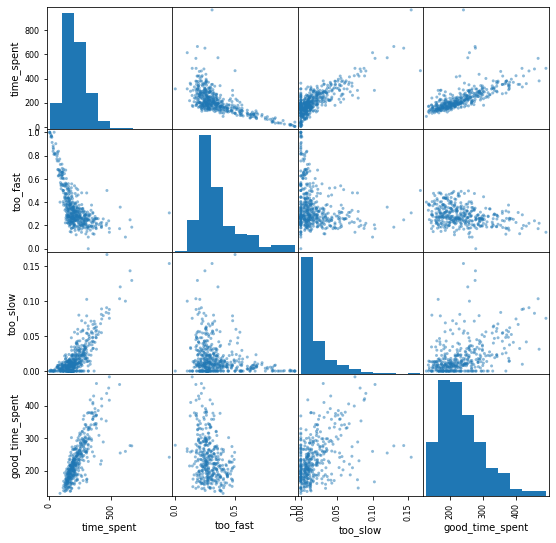

In [ ]:
pd.plotting.scatter_matrix(station_stat_multi, figsize = (9,9))
plt.show()

1. Итак, вы выявили аномалии, отфильтровали данные, создали показатели для типичного времени заезда и изучили влияние большого числа аномальных заездов на эти показатели. Проверьте всё ещё разок, прежде чем делиться результатами. Для начала визуализируйте распределение лучших показателей заездов с типичной продолжительностью по сетям АЗС. Выполните следующие шаги, используя чистый код. 
Не вводите вспомогательные переменные: 

Упорядочьте таблицу `final_stat` по возрастанию лучших показателей из столбца `median_time`. `median_time` — это медиана для распределения медианной продолжительности заправки по АЗС в каждой сети. 

Постройте столбчатый график по значениям `median_time`. Задайте размер графика 10х5 дюймов.

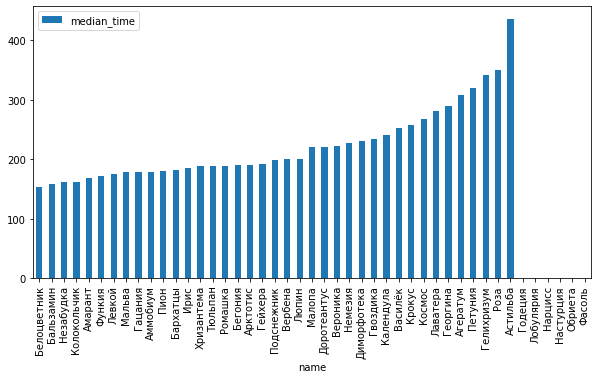

In [ ]:
final_stat.sort_values('median_time').plot(y = 'median_time', kind = 'bar', figsize = (10,5))
plt.show()

2. Предыдущий столбчатый график отображает шесть сетей АЗС без данных: «Годецию», «Лобулярию», «Нарцисс», «Обриету» и «Фасоль». 

Это значения `NaN` в `final_stat`, которые появились, потому что вы исключили непопулярные АЗС. Таблица `final_stat` была создана объединением таблиц `stat` (включает все АЗС) и `good_stat2` (исключает АЗС с малым числом заездов). Так как в `join()` по умолчанию левое соединение, индексы из `final_stat` будут идентичны индексам из `stat`. Поэтому любой индекс из таблицы `stat`, которого нет в таблице `good_stat2`, после объединения получит значение `NaN`. Наведите порядок в графике, удалив значения `NaN`. 

Выполните следующие шаги: 

Отбросьте значения `NaN` в столбце `median_time` таблицы `final_stat`. 

Упорядочьте таблицу `final_stat` по возрастанию значений в столбце `median_time`. 

Постройте столбчатый график `median_time`. Задайте размер графика 10х5 дюймов. Добавьте линии сетки.

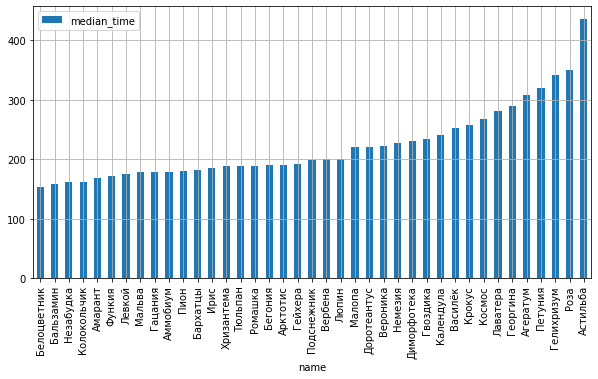

In [ ]:
final_stat.dropna(subset = ['median_time']).sort_values('median_time').plot(y = 'median_time', kind = 'bar', grid = True, figsize = (10,5))
plt.show()

3. До этого момента вы фильтровали данные по количеству заездов на одну АЗС и по длительности заправки. Но стоит учесть ещё одну переменную: число АЗС внутри сетей. С точки зрения маркетинга интересны и сети с большей продолжительностью заправки, и сети, в которых много АЗС. Значит, нужно исключить те сети, в которых заправочных станций мало. А для начала посмотрите, как число заправочных станций распределяется по сетям. 
Используя данные из таблицы `final_stat`, постройте гистограмму, отображающую число АЗС внутри сетей. Поделите значения на 100 корзин.

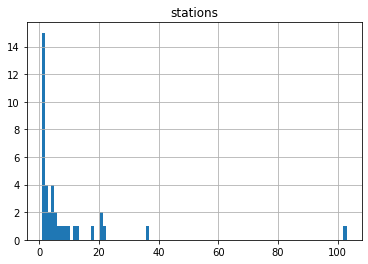

In [ ]:
final_stat.hist('stations',bins = 100)
plt.show()

4. Так как с точки зрения маркетинга небольшие сети неважны, создайте новую переменную с данными только крупных сетей. 

Выполните следующие шаги: 

Создайте переменную `big_nets_stat` и поместите в неё строки из таблицы `final_stat`, в которых значение переменной `stations` больше 10. 

Выведите новую переменную на экран и изучите результат.

In [ ]:
big_nets_stat = final_stat.query('stations > 10')
big_nets_stat 

,time_spent,good_time_spent,stations,median_time
name,,,,
Василёк,268.849897,264.0,103.0,252.00
Гейхера,167.445947,204.0,12.0,192.00
Календула,207.357323,254.0,36.0,240.00
Колокольчик,119.131564,161.0,21.0,161.00
Люпин,235.440937,186.0,13.0,200.00
Мальва,136.562234,182.0,22.0,177.75
Немезия,186.535207,226.0,21.0,227.50
Роза,260.877217,315.0,18.0,350.00


5. Теперь можно разделить все сети на две группы: «Большая восьмёрка» и «Другие». Вторая группа будет восприниматься как одна большая сеть. Лучшие показатели средней продолжительности заправки содержатся в таблице `good_stat2` и рассчитываются по данным `station_stat_full` (просмотрите код, чтобы вспомнить эти вычисления). 

Повторите вычисления, но вместо того, чтобы группировать данные по столбцу `name`, сгруппируйте данные по новому столбцу, содержащему категорию `Другие`. 

Чтобы создать этот столбец в таблице `station_stat_full`, примените метод `where()` для сравнения столбца `name` в `station_stat_full` с индексами `big_nets_stat`. 

Выполните следующие шаги: 
1. Добавьте в таблицу `station_stat_full` новый столбец `group_name`. 
2. Поместите в столбец `group_name` значения столбца `name`, если сеть присутствует в `big_nets_stat`. Если столбец name отсутствует, поместите в `group_name` значения из `Другие`. 
3. Выведите на экран первые пять строк таблицы `station_stat_full`.

In [ ]:
station_stat_full['group_name'] = station_stat_full['name'].where(station_stat_full['name'].isin(big_nets_stat.index), 'Другие')
station_stat_full.head()

,name,count,time_spent,group_name
id,,,,
00ca1b70,Вероника,131,166.0,Другие
0178ce70,Василёк,164,234.5,Василёк
01abf4e9,Гацания,30,181.5,Другие
030a9067,Колокольчик,228,135.5,Колокольчик
03740f2d,Василёк,157,289.0,Василёк


6. Итак, у вас есть столбец `Другие`, в котором собраны не очень крупные сети. Теперь просто повторите анализ, в процессе которого создали `good_stat2`, но в этот раз сгруппируйте данные по `group_name`. 

Выполните следующие шаги: 
1. Создайте переменную `stat_grouped`, которая повторяет вычисления `good_stat2`, но группирует по `group_name`. 
2. Переименуйте столбцы в `stat_grouped` на `time_spent` и `count`. 
3. Упорядочьте `stat_grouped` по возрастанию значений столбца `time_spent`. Убедитесь, что изменение постоянное, а не временное. Выведите на экран `stat_grouped`.

In [ ]:
stat_grouped = station_stat_full.query('count > 30').pivot_table(index = 'group_name', values = 'time_spent', aggfunc=['count','median'])
stat_grouped. columns = ['count','time_spent']
stat_grouped.sort_values('time_spent')
stat_grouped

,count,time_spent
group_name,,
Василёк,103,252.00
Гейхера,12,192.00
Другие,104,208.75
Календула,36,240.00
Колокольчик,21,161.00
Люпин,13,200.00
Мальва,22,177.75
Немезия,21,227.50
Роза,18,350.00


7. Теперь у вас есть таблица с лучшими показателями типичной продолжительности заезда для крупных сетей АЗС. Дальше уже команде маркетинга решать, сколько сил тратить на то, чтобы завоевать «Розу» (типичная продолжительность заезда 350 секунд, 18 заправочных станций) или «Василька» (типичная продолжительность заезда 252 секунды, 103 заправочные станции). Визуализируйте относительную величину этих сетей с точки зрения количества заправочных станций. 

По данным `stat_grouped` постройте круговую диаграмму с числом АЗС в каждой сети. Задайте её размер 8x8 дюймов.

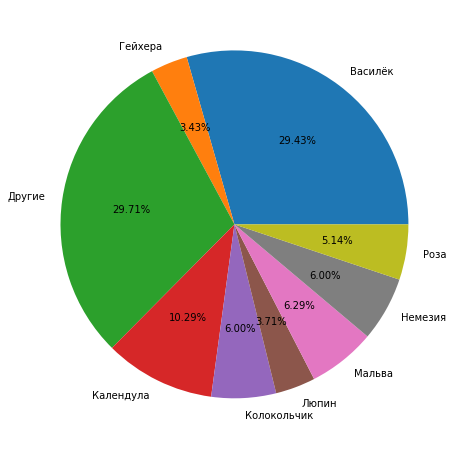

In [ ]:
fig = plt.figure(figsize =(8, 8))
plt.pie(stat_grouped['count'], labels = stat_grouped.index, autopct = '%1.2f%%')
plt.show()

1. Напоследок посмотрите, как продолжительность заездов распределяется по девяти сетям («Большая восьмёрка» и «Другие»). Загвоздка может быть вот в чём: если продолжительность сильно различается, то сравнивать показатели разных сетей будет неправильно. Например, если в сети больше заправок продолжительностью по 60–70 секунд, чем в других, это может понижать медианное значение. 

Чтобы проверить, не происходит ли такое, сгруппируйте данные из `good_data` по `group_name` и постройте гистограммы. Первым делом создайте столбец для группировки. 

Выполните следующие шаги: 
1. Создайте столбец `group_name` в таблице `good_data` так же, как делали раньше в `station_stat_full`. 
2. Выведите на экран первые 5 строк `good_data`, чтобы проверить работу нового столбца.

In [ ]:
good_data['group_name'] = good_data['name'].where(good_data['name'].isin(big_nets_stat.index), 'Другие')
good_data.head()

<ipython-input-66-6c661b1d9523>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_data['group_name'] = good_data['name'].where(good_data['name'].isin(big_nets_stat.index), 'Другие')


,date_time,id,time_spent,name,local_time,date_hour,too_fast,too_slow,group_name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 19:53:58,2018-04-06 20:00:00,False,False,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 20:28:24,2018-04-03 20:00:00,False,False,Василёк
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,2018-04-02 11:23:21,2018-04-02 11:00:00,False,False,Василёк
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,2018-04-07 03:34:08,2018-04-07 04:00:00,False,False,Василёк
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,2018-04-05 16:19:39,2018-04-05 16:00:00,False,False,Василёк


2. Теперь, когда есть столбец `group_name`, сгруппируйте `good_data` и постройте гистограмму, чтобы увидеть, как распределяется продолжительность заездов в каждой сети. Выполните следующие шаги: 
1. Сгруппируйте `good_data` по `group_name`, используя цикл `for`. Используйте в цикле переменные `name` и `group_data`. В каждой итерации `group_data` вызывайте метод `hist()`, чтобы построить гистограмму по значениям `time_spent` на 50 корзин.

3. Построенные гистограммы будут полезными, только если вы знаете, к какой именно сети относятся данные. Повторите предыдущее задание, но теперь сделайте название сети заголовком гистограмм. Как вы помните, метод `plot()` даёт больше вариантов для форматирования, чем метод `hist()`. 
Выполните следующие шаги: 
1. Напишите ещё один цикл `for`, как в предыдущем задании. 
2. Используйте в качестве переменных цикла `name` и `group_data`. 
3. В каждой итерации `group_data` вызовите метод `plot()`, чтобы построить гистограмму по значениям `time_spent`. 
4. Поместите в название каждой гистограммы переменную цикла `name` и разбейте гистограммы на 50 корзин.

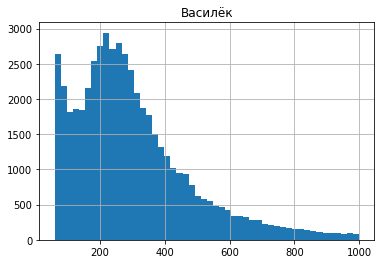

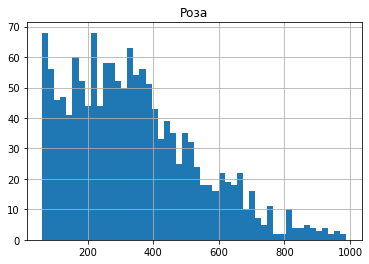

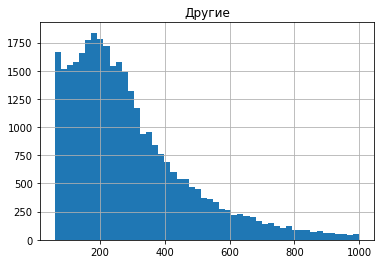

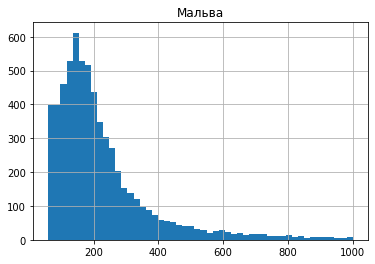

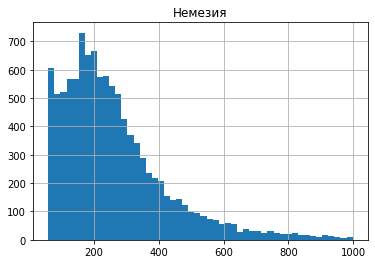

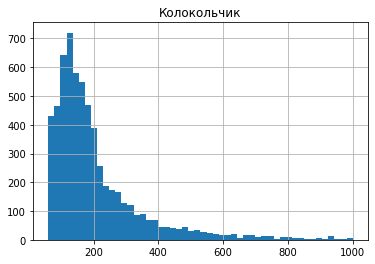

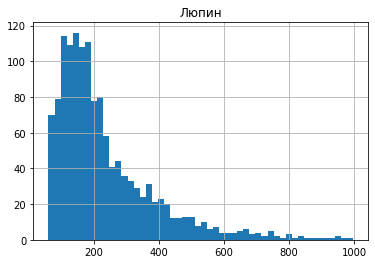

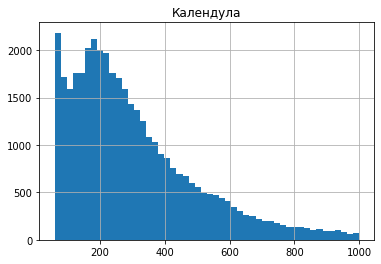

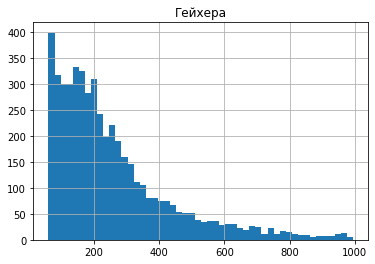

In [ ]:
for names in good_data['group_name'].unique():
  good_data[good_data['group_name']==names].hist('time_spent',bins=50)
  plt.title(names)